# Exploratory Data

1. Correlation
2. Check multikolinearity
3. Regression 

Get data from dataframe

In [1]:
import pandas as pd

df = pd.read_excel('dataset/house_clean.xlsx')

pd.set_option('display.max_colwidth', None)

df.head()

,description,price,buildingArea,landArea,bedroom,bathroom,garage
0,"rumah murah hook tebet timur, tebet, jakarta selatan",3800000000,220,220,3,3,0
1,"rumah modern di tebet dekat stasiun, tebet, jakarta selatan",4600000000,180,137,4,3,2
2,"rumah mewah 2 lantai hanya 3 menit ke tebet, tebet, jakarta selatan",3000000000,267,250,4,4,4
3,"rumah baru tebet, tebet, jakarta selatan",430000000,40,25,2,2,0
4,"rumah bagus tebet komp gudang peluru lt 350m, tebet, jakarta selatan",9000000000,400,355,6,5,3


## 1. Corelation

In [2]:
print('Correlation between each feature and price:')

correlation = df[['price', 'buildingArea', 'landArea', 'bedroom', 'bathroom', 'garage']].corr()
print(correlation['price'].drop('price'))


Correlation between each feature and price:
buildingArea    0.746964
landArea        0.809649
bedroom         0.322879
bathroom        0.404795
garage          0.484590
Name: price, dtype: float64


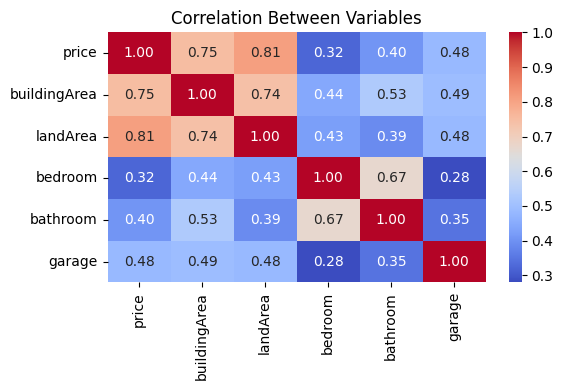

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import t

# Parameter
alpha = 0.05
n = df.shape[0]
data = n - 2

t_critical = t.ppf(1 - alpha/2, data)

r_table = t_critical / ((t_critical**2 + data)**0.5)
print(f"r table (n={n}, α={alpha}): {r_table:.4f}")


r table (n=1008, α=0.05): 0.0618


## 2. Multikolinearity and Outlier

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

multi = df[['buildingArea', 'landArea', 'bedroom', 'bathroom', 'garage']]

const = add_constant(multi)

vif = pd.DataFrame()
vif['Feature'] = const.columns
vif['VIF'] = [variance_inflation_factor(const.values, i) for i in range(const.shape[1])]

vif

,Feature,VIF
0,const,10.511813
1,buildingArea,2.693621
2,landArea,2.412484
3,bedroom,1.927036
4,bathroom,2.123713
5,garage,1.397678


In [57]:
def remove_outliers(df, columns):
    df_filtered = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]
    return df_filtered

clean_df = remove_outliers(df, ['price'])

print(f'total outlier    : {df.shape[0] - clean_df.shape[0]}')

total outlier    : 94


## 3. Regression

In [56]:
import statsmodels.api as sm

X1 =  df[['buildingArea', 'landArea']]
y = df['price']

X_model1 = sm.add_constant(X1)
model1 = sm.OLS(y, X_model1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1193.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          3.78e-266
Time:                        11:03:13   Log-Likelihood:                -23716.
No. Observations:                1008   AIC:                         4.744e+04
Df Residuals:                    1005   BIC:                         4.745e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.595e+09   2.35e+08     -6.780   